In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

In [6]:
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.coef_
reg.intercept_
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_
reg = linear_model.Ridge(alpha=0.1)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.coef_
reg.intercept_

# prevent overfitting by penalizing large coefficients, which can improve the model's performance on unseen data. The penalty term is controlled by a hyperparameter, often denoted as 𝛼α.

# Ridge Regression:
# Ridge regression is a type of linear regression that adds a penalty term to the loss function to prevent overfitting. This penalty term is proportional to the square of the magnitude of the coefficients. The penalty term is controlled by a hyperparameter, often denoted as 𝛼α.

# Ridge regression is useful when dealing with datasets where the number of features is greater than the number of samples. It helps in reducing the impact of multicollinearity among the features and stabilizes the model's coefficients.



0.07209302325581396

In [ ]:
# Lasso

from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

# The alpha parameter controls the strength of the L1 regularization applied to the model, which helps in feature selection by shrinking some coefficients to zero.

# Lasso Regression:
# Lasso (Least Absolute Shrinkage and Selection Operator) regression is another type of linear regression that adds a penalty term to the loss function. This penalty term is proportional to the absolute value of the coefficients. The penalty term is controlled by a hyperparameter,

# Lasso regression is useful when dealing with datasets where the number of features is greater than the number of samples. It helps in selecting the most important features and performing feature selection.


Mean Squared Error: 0.6135115198058131
R^2 Score: 0.5318167610318159
Deviations (Residuals): [-0.56928114 -1.15396314  2.69178489 ...  0.82382105 -0.91731173
 -0.29710646]
Coefficients: [ 3.92693362e-01  1.50810624e-02 -0.00000000e+00  0.00000000e+00
  1.64168387e-05 -3.14918929e-03 -1.14291203e-01 -9.93076483e-02]


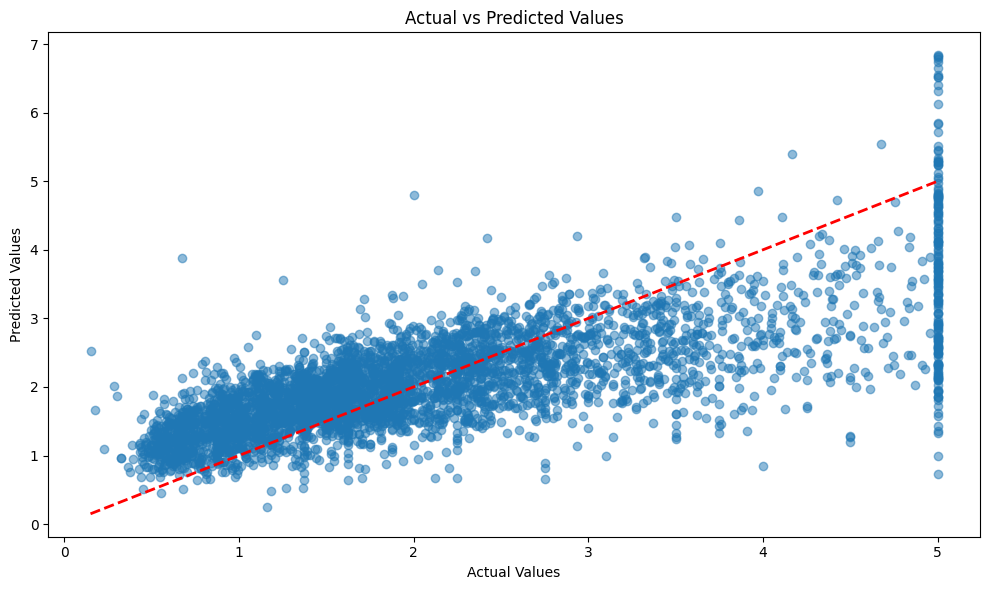

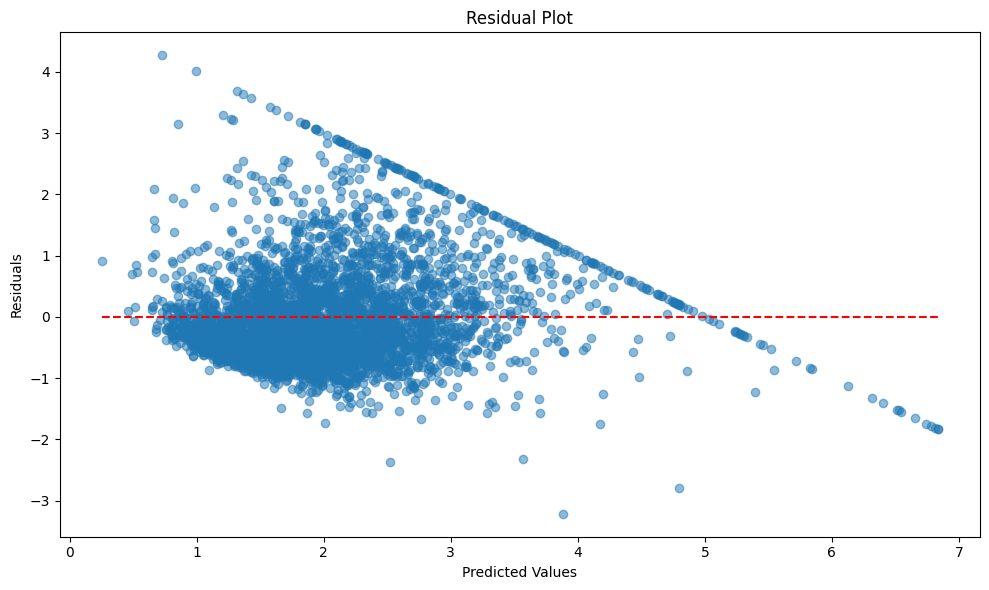

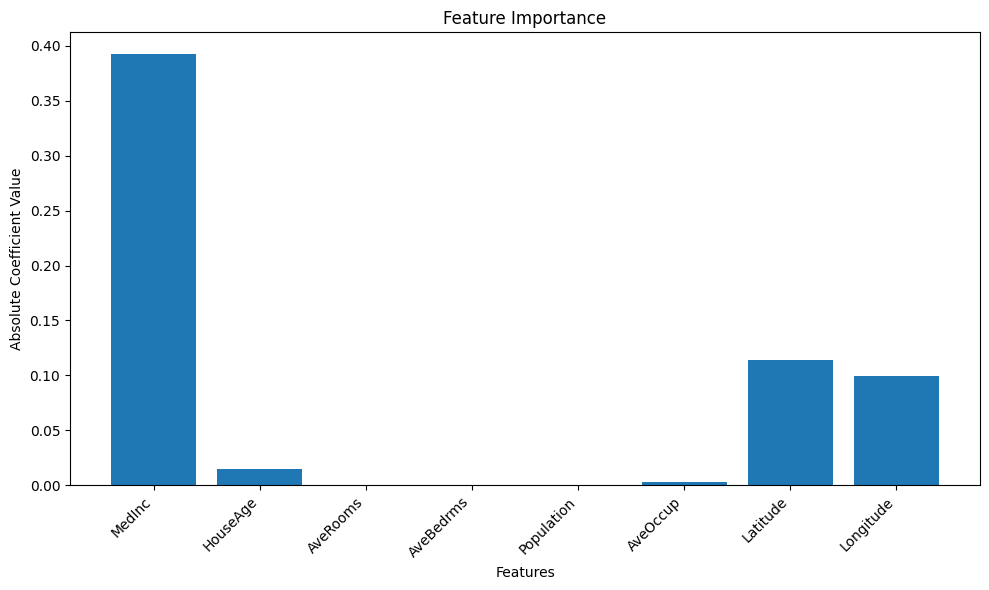

In [1]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np

california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# if want to recreate the particular thing give the same random state

#   fit the Lasso regression model 
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

deviations = y_test - y_pred

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Deviations (Residuals):", deviations)
print("Coefficients:", lasso.coef_)


# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, deviations, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Plot feature importance
feature_importance = np.abs(lasso.coef_)
feature_names = california.feature_names

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [2]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)
reg.predict([[1, 0.]])
reg.coef_

array([0.49999993, 0.49999993])

In [3]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)
reg.predict([[1, 0.]])
reg.coef_


array([0.49999993, 0.49999993])

In [ ]:
                                                          # SUPPORT VECTOR MACHINES

In [10]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
clf.predict([[2.,2.]])
# clf.support_vectors_
# clf.support_
clf.class_weight_

array([1., 1.])

In [11]:
from sklearn import svm

X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
dec = clf.decision_function([[1]])
dec.shape[1] # 6 classes: 4*3/2 = 6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)
dec = lin_clf.decision_function([[1]])
# dec.shape[1]